## This notebook aims to visualize the different asset distributions produced by CGAN

In [1]:
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.insert(0, parent_dir)

from utilities.gan_plotting import extensive_plotting
from utilities.backtesting_plots import backtest_var_single_asset
from utilities.gan_plotting import load_generated_returns
from backtesting.perform_var_tests import perform_var_backtesting_tests
from backtesting.perform_distribution_tests import perform_distribution_tests
from utilities.gan_plotting import create_rolling_empirical


In [2]:
import os
print(os.getcwd())

c:\Users\nicka\master-thesis\internal_models\CGANs


## Note to self -- We only test assets MSCIWORLD, HY and EONIA

In [3]:
def fetch_data_df():
    # Load the data
    df = pd.read_csv('../../data/final_daily_returns_asset_classes.csv', index_col=0, parse_dates=True)
    df.index = pd.to_datetime(df.index)
    start_test_date = os.getenv("START_TEST_DATE")
    
    if start_test_date is None:
        raise ValueError("Environment variable 'START_TEST_DATE' is not set.")

    start_test_date = pd.to_datetime(start_test_date)

    columns = [0]#[0,1,2,4]
    selected_columns = df.iloc[:, columns]  # Remember: Python uses 0-based indexing

    pre_test_df = selected_columns[selected_columns.index < start_test_date]
    test_df = selected_columns[selected_columns.index >= start_test_date].iloc[:75]
    
    return pre_test_df, test_df

returns_df, test_returns_df = fetch_data_df()

In [7]:
returns_df

,REEL
Date,
2005-10-11,0.003231
2005-10-12,-0.003550
2005-10-13,-0.018599
2005-10-14,-0.007856
2005-10-17,-0.003613
...,...
2019-12-23,0.000807
2019-12-24,0.003047
2019-12-27,0.012164


In [4]:
asset_names = returns_df.columns

In [5]:
from internal_models.utilities.generate_quarterly_scenarios import generate_quarterly_scenarios

## TRAINING CGAN

In [6]:
from cgan2 import CGAN2
from CGAN1 import CGAN1
from cgan3 import CGAN3
from NOVAGAN import NovaGAN
from AuroraGAN import AuroraGAN
from OliviaGAN import OliviaGAN
from CrazyGAN import CrazyGAN
from TCNGAN import TCNGAN

gan_dict = {}
scenarios_results = {}

for asset_name in returns_df.columns:
    print(f"Training CGAN for {asset_name}...")
    asset_returns = returns_df[asset_name]
    
    # Create WGAN instance for the current asset
    gan = TCNGAN(asset_returns, asset_name, lambda_decay=0.0)
    
    # Train WGAN for this asset
    gan.train()
    gan_dict[asset_name] = gan
    
    print(f"Finished training CGAN for {asset_name}.\n")

Training CGAN for REEL...


c:\Users\nicka\master-thesis\packages\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


[Epoch 0/200] [Batch 0/27] [D loss: 29.7949] [G loss: 262.0119] [Structure: 4.5474] [Moments: 0.0473] [Quantile: 13.1222]
[Epoch 0/200] [Batch 10/27] [D loss: 29.2954] [G loss: 265.1466] [Structure: 4.6563] [Moments: 0.0398] [Quantile: 13.2840]
[Epoch 0/200] [Batch 20/27] [D loss: 28.5753] [G loss: 266.8820] [Structure: 4.5456] [Moments: 0.0319] [Quantile: 13.3711]
[Epoch 1/200] [Batch 0/27] [D loss: 27.9148] [G loss: 263.8379] [Structure: 4.4192] [Moments: 0.0248] [Quantile: 13.2187]
[Epoch 1/200] [Batch 10/27] [D loss: 26.4221] [G loss: 261.9116] [Structure: 4.5876] [Moments: 0.0196] [Quantile: 13.1223]
[Epoch 1/200] [Batch 20/27] [D loss: 24.6439] [G loss: 257.7569] [Structure: 4.4318] [Moments: 0.0171] [Quantile: 12.9160]
[Epoch 2/200] [Batch 0/27] [D loss: 23.2467] [G loss: 236.8924] [Structure: 4.4452] [Moments: 0.0182] [Quantile: 11.8738]
[Epoch 2/200] [Batch 10/27] [D loss: 20.4581] [G loss: 228.3317] [Structure: 4.4589] [Moments: 0.0134] [Quantile: 11.4460]
[Epoch 2/200] [Batc

KeyboardInterrupt: 

## RESULTS

In [ ]:
scenarios = gan.generate_scenarios(num_scenarios=4000)

Generated scenarios saved to: generated_CGAN_output_test\generated_returns_REEL_final_scenarios.pt


Loaded Generated returns from: generated_CGAN_output_test\generated_returns_REEL_final_scenarios.pt
Scaled = False


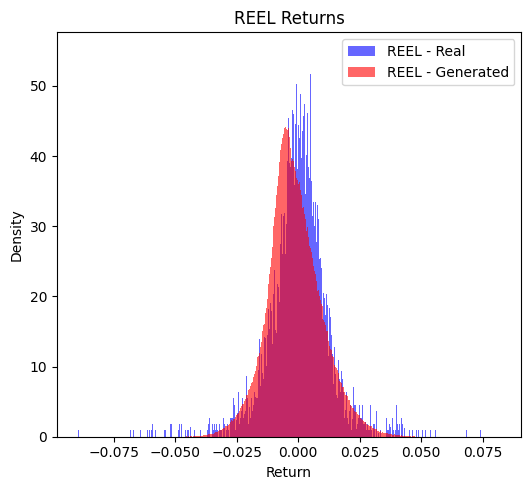


📊 Return Statistics Summary:
           Asset      Mean  Std Dev  Skewness  Kurtosis  99.5% VaR
     REEL - Real  0.000193 0.012916 -0.270455  4.969021  -0.051644
REEL - Generated -0.001328 0.011103  0.300257  0.831743  -0.030715



═══════════════════════════
║  ANALYZING ASSET: REEL  ║
═══════════════════════════

Loaded Generated returns from: generated_CGAN_output_test\generated_returns_REEL_final_scenarios.pt
Variance of Real Data: 0.000167
Variance of Generated Data: 0.000122
✅ Generated Data Shows Reasonable Variance
Mean Pairwise Distance (Real): 0.276380
Mean Pairwise Distance (Generated): 0.246910
✅ Generated samples are reasonably diverse


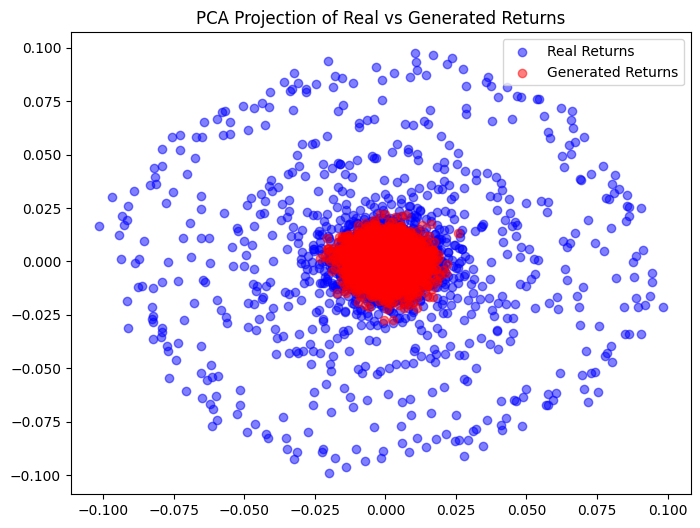

Loaded Generated returns from: generated_CGAN_output_test\generated_returns_REEL_final_scenarios.pt


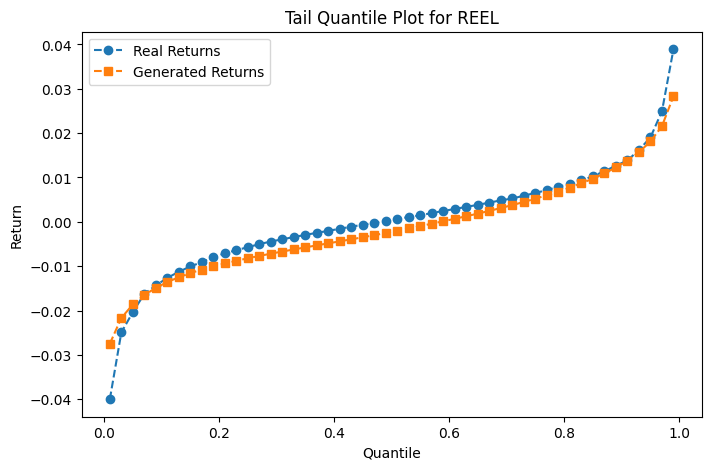


════════════════════════════════════════════════
║  COMPUTING NEAREST DISTANCE HISTOGRAM: REEL  ║
════════════════════════════════════════════════

Loaded Generated returns from: generated_CGAN_output_test\generated_returns_REEL_final_scenarios.pt

📊 Distance Summary for REEL:
Min Distance: 0.000000
Max Distance: 1.793856
Mean Distance: 0.001307
Median Distance: 0.000358
Standard Deviation: 0.005608


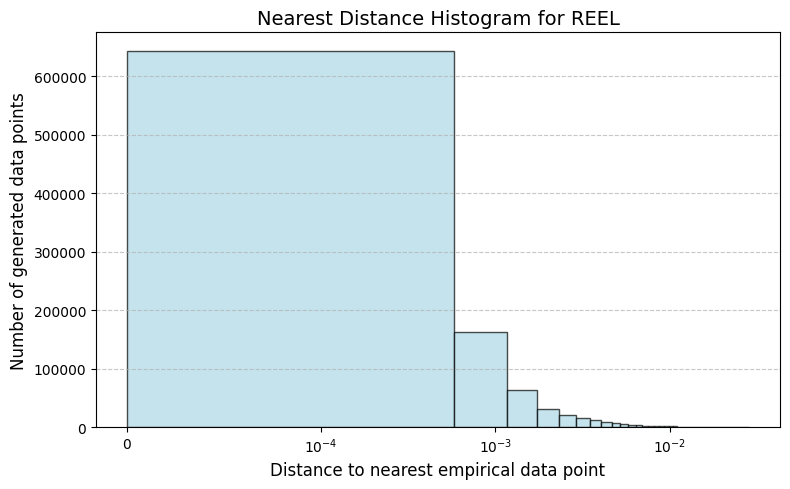


══════════════════════════════════════════
║  COMPUTING WASSERSTEIN DISTANCE: REEL  ║
══════════════════════════════════════════

Loaded Generated returns from: generated_CGAN_output_test\generated_returns_REEL_final_scenarios.pt
📊 Wasserstein Distance for REEL: 0.002304



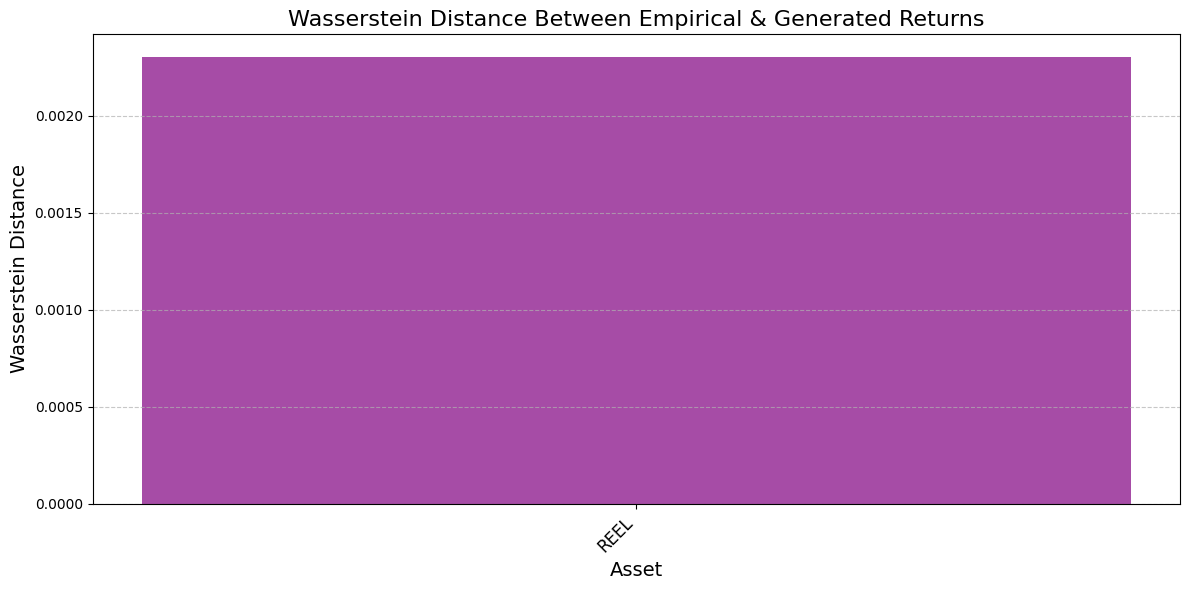

In [ ]:
extensive_plotting(scaled=False, returns_df=returns_df, test=True, quarterly=False)

## Testing on test

In [ ]:
def plot_returns_and_var(asset_cum, i, var_level=0.5):

    var = np.percentile(asset_cum, var_level)
    
    if i % 10 == 0:
        plt.figure(figsize=(10, 6))
        plt.hist(asset_cum, bins=500, alpha=0.75, color='skyblue')
        plt.axvline(x=var, color='red', linestyle='--', linewidth=2, 
                    label=f'VaR at {100-var_level}% = {var:.4f}')
        
        plt.xlabel('Cumulative Returns')
        plt.ylabel('Frequency')
        plt.title('Distribution of Asset Returns with VaR')
        plt.legend()
        
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    return var

In [ ]:
from tqdm import tqdm
from utilities.bof_var_plot import plot_bof_var

portfolio_var_results = {}  

for asset_name in test_returns_df.columns:
    asset_returns = returns_df[asset_name]
    gan = gan_dict[asset_name]
    foundNAN = False
    print("Asset =", asset_name)

    i = 0
    for test_day in tqdm(test_returns_df.index, desc="Processing Dates", unit="dates"):
        i += 1
        new_return = test_returns_df.loc[test_day, asset_name]
        new_row = pd.DataFrame({asset_name: [new_return]}, index=[test_day])
        asset_returns = pd.concat([asset_returns, new_row])
        
        if test_day != test_returns_df.index[-1]:
            next_day = test_returns_df.index[test_returns_df.index.get_loc(test_day) + 1]
        else:
            print(f"Warning: {test_day} is the last day in the index, no next day available.")
            continue

        scenarios = gan.generate_new_scenarios_from_return(new_return, test_day, 10, save=False, num_scenarios=10000)
        asset_cum = np.prod(1 + scenarios, axis=1) - 1
        var_99_5 = plot_returns_and_var(asset_cum, i)
        print("VaR", var_99_5)

        if var_99_5 > 0: var_99_5 = 0.0

        has_inf = np.isinf(scenarios).any()
        has_nan = np.isnan(scenarios).any()

        if has_nan or has_inf:
            print("FOUND NAN")
            foundNAN = True
            break

        portfolio_var_results[next_day] = var_99_5
    
    if foundNAN: break

Asset = REEL


Processing Dates:   1%|▏         | 1/75 [00:05<07:06,  5.76s/dates]

VaR -0.38460472


Processing Dates:   3%|▎         | 2/75 [00:12<07:21,  6.05s/dates]

VaR -0.38342947


Processing Dates:   4%|▍         | 3/75 [00:18<07:31,  6.28s/dates]

VaR -0.38589862


Processing Dates:   5%|▌         | 4/75 [00:24<07:15,  6.14s/dates]

VaR -0.38376448


Processing Dates:   7%|▋         | 5/75 [00:30<07:16,  6.23s/dates]

VaR -0.38429087


Processing Dates:   8%|▊         | 6/75 [00:36<07:01,  6.11s/dates]

VaR -0.3833802


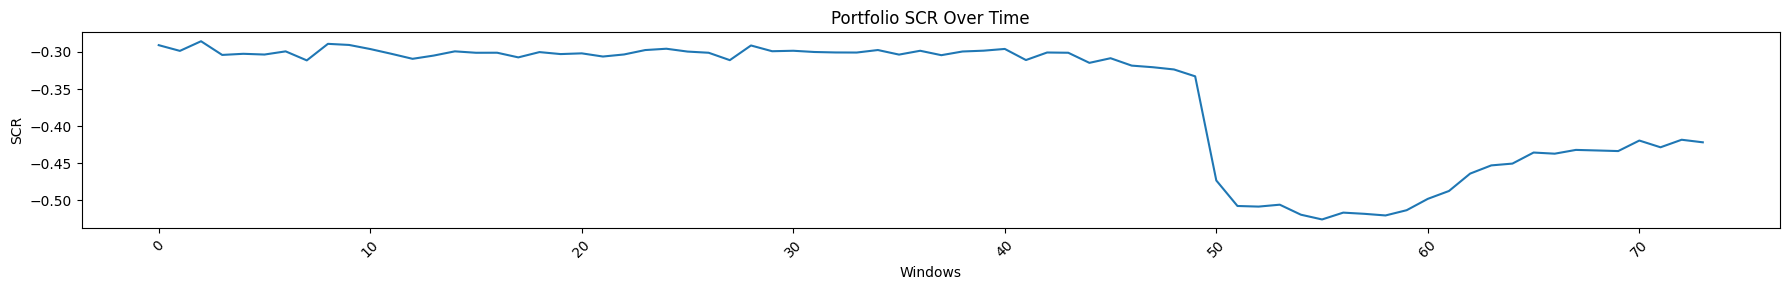

In [ ]:
sorted_dates = sorted(portfolio_var_results.keys())
scr_values = [portfolio_var_results[date] for date in sorted_dates]

plt.figure(figsize=(18, 3))
plt.plot(scr_values, linestyle='-')
plt.xlabel("Windows")
plt.ylabel("SCR")
plt.title("Portfolio SCR Over Time")
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()